In [11]:
#Import under 15 incidence by site


import pandas as pd
from io import StringIO

data = """
outcome	group	Est.	se	low	high
Preterm Birth	> 0.1 - 5 mg/L	0.69	0.18	0.33	1.05
Preterm Birth	> 5  - 10 mg/L	0.57	0.30	-0.03	1.16
Preterm Birth	> 10 mg/L	0.60	0.42	-0.23	1.43
Low-Birth Weight	> 0.1 - 5 mg/L	-0.15	0.15	-0.44	0.14
Low-Birth Weight	> 5  - 10 mg/L	0.29	0.16	-0.03	0.61
Low-Birth Weight	> 10 mg/L	0.09	0.32	-0.54	0.72






"""

# Use StringIO to convert the string data into a file-like object
data = StringIO(data)

# Read the data into a pandas DataFrame
df = pd.read_csv(data, sep='\t')
print(df.head())

            outcome           group  Est.    se   low  high
0     Preterm Birth  > 0.1 - 5 mg/L  0.69  0.18  0.33  1.05
1     Preterm Birth  > 5  - 10 mg/L  0.57  0.30 -0.03  1.16
2     Preterm Birth       > 10 mg/L  0.60  0.42 -0.23  1.43
3  Low-Birth Weight  > 0.1 - 5 mg/L -0.15  0.15 -0.44  0.14
4  Low-Birth Weight  > 5  - 10 mg/L  0.29  0.16 -0.03  0.61


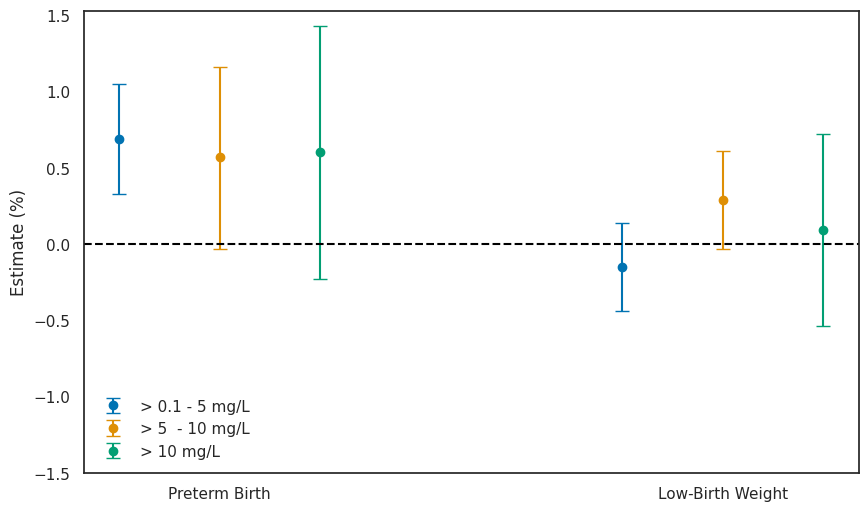

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="white", palette="colorblind")

# Assuming df is your DataFrame and it has been defined already
groups = df['group'].unique()

plt.figure(figsize=(10, 6))

# Plot points with custom confidence intervals
group_offsets = np.linspace(-0.2, 0.2, len(groups))  # adjust these values based on your preference

for i, group in enumerate(groups):
    df_group = df[df['group'] == group]
    x = np.arange(len(df_group['outcome'])) + group_offsets[i]

    plt.errorbar(x, df_group['Est.'],
                 yerr=[df_group['Est.'] - df_group['low'], df_group['high'] - df_group['Est.']],
                 fmt='o', capsize=5, label=group)

plt.axhline(0, color='black', linestyle='--')  # Add a dashed black line at X=0
plt.xticks(np.arange(len(df_group['outcome'])), df_group['outcome'])
plt.title('')
plt.yticks(np.arange(-1.5, 1.6, 0.5))
plt.xlabel('')
plt.ylabel('Estimate (%)')
plt.legend(loc="lower left", frameon=False)
plt.show()
